In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='12G')
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "23.0.1" 2024-10-15; OpenJDK Runtime Environment Homebrew (build 23.0.1); OpenJDK 64-Bit Server VM Homebrew (build 23.0.1, mixed mode, sharing)
  Starting server from /Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmp0qmyzxla
  JVM stdout: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmp0qmyzxla/h2o_ralf_started_from_python.out
  JVM stderr: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmp0qmyzxla/h2o_ralf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_ralf_nr2agh
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.46.0.6


In [2]:
%%time

import warnings

warnings.filterwarnings('ignore')

CPU times: user 19 μs, sys: 0 ns, total: 19 μs
Wall time: 21 μs


In [3]:
%%time
import os

data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train = h2o.import_file(data_file)
train.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 159 ms, sys: 41.7 ms, total: 200 ms
Wall time: 4.32 s


id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35
p01_0,p01,1970-01-01 06:10:00,nan,nan,9.6,nan,nan,9.7,nan,nan,9.2,nan,nan,8.7,nan,nan,8.4,nan,nan,8.1,nan,nan,8.3,nan,nan,9.6,nan,nan,11.1,nan,nan,11.8,nan,nan,12.8,nan,nan,13.9,nan,nan,14.2,nan,nan,14.2,nan,nan,15.4,nan,nan,17.2,nan,nan,18.2,nan,nan,18.4,nan,nan,18,nan,nan,17.3,nan,nan,17.5,nan,nan,17.3,nan,nan,16.2,nan,nan,15.1,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
p01_1,p01,1970-01-01 06:25:00,nan,nan,9.7,nan,nan,9.2,nan,nan,8.7,nan,nan,8.4,nan,nan,8.1,nan,nan,8.3,nan,nan,9.6,nan,nan,11.1,nan,nan,11.8,nan,nan,12.8,nan,nan,13.9,nan,nan,14.2,nan,nan,14.2,nan,nan,15.4,nan,nan,17.2,nan,nan,18.2,nan,nan,18.4,nan,nan,18,nan,nan,17.3,nan,nan,17.5,nan,nan,17.3,nan,nan,16.2,nan,nan,15.1,nan,nan,14.4,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0083,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0583,0.0417,0.0417,0.0417,0.0417,0.0417,nan,na

In [4]:
%%time

# remove id
x = train.columns[1:]
y = 'bg+1:00'

CPU times: user 12 μs, sys: 14 μs, total: 26 μs
Wall time: 26.9 μs


In [5]:
%%time

aml = H2OAutoML(max_models=500, seed=1000, max_runtime_secs=3600)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
12:39:06.251: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 14.8 s, sys: 3.57 s, total: 18.4 s
Wall time: 1h 4s


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,1065.0,1065.0,2614127.0,10.0,15.0,14.99061,23.0,706.0,191.32019
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-11-10 12:39:28,0.007 sec,0.0,2.9949534,2.3405030,8.9697458,3.0266364,2.3625254,9.1605281
,2024-11-10 12:39:34,5.462 sec,5.0,2.3331383,1.8132786,5.4435345,2.3869799,1.8520112,5.6976729
,2024-11-10 12:39:38,9.610 sec,10.0,2.0055533,1.5345795,4.0222439,2.0921346,1.5961337,4.3770271
,2024-11-10 12:39:41,13.377 sec,15.0,1.8390823,1.3843106,3.3822239,1.9550299,1.4671517,3.8221421
,2024-11-10 12:39:45,16.934 sec,20.0,1.7345259,1.2897073,3.0085799,1.8786967,1.3920782,3.5295014
,2024-11-10 12:39:48,20.261 sec,25.0,1.6654626,1.2293339,2.7737658,1.8347633,1.3489924,3.3663562
,2024-11-10 12:39:51,23.090 sec,30.0,1.6240419,1.1949882,2.6375121,1.8120809,1.3276690,3.2836373
,2024-11-10 12:39:54,25.995 sec,35.0,1.5853842,1.1643578,2.5134431,1.7920168,1.3097784,3.2113241


In [6]:
%%time

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

CPU times: user 2.53 ms, sys: 2.11 ms, total: 4.64 ms
Wall time: 5.25 ms


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241110_123903,1.38313,1.91304,0.987551,0.152322,1.91304
GBM_4_AutoML_1_20241110_123903,1.45126,2.10615,1.03698,0.159863,2.10615
GBM_grid_1_AutoML_1_20241110_123903_model_9,1.50085,2.25254,1.06925,0.164261,2.25254
GBM_grid_1_AutoML_1_20241110_123903_model_12,1.50957,2.27881,1.07751,0.164897,2.27881
GBM_grid_1_AutoML_1_20241110_123903_model_7,1.52486,2.32519,1.09081,0.166604,2.32519
GBM_grid_1_AutoML_1_20241110_123903_model_3,1.53105,2.34411,1.1013,0.167779,2.34411
GBM_3_AutoML_1_20241110_123903,1.59521,2.54468,1.16708,0.174911,2.54468
GBM_grid_1_AutoML_1_20241110_123903_model_1,1.67007,2.78913,1.21301,0.181851,2.78913
GBM_grid_1_AutoML_1_20241110_123903_model_11,1.67916,2.81958,1.22649,0.183696,2.81958
GBM_2_AutoML_1_20241110_123903,1.6802,2.82307,1.23165,0.183778,2.82307


In [7]:
%%time
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = h2o.import_file(test_file)

y_pred = aml.predict(test_data=test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 65.8 ms, sys: 16.9 ms, total: 82.8 ms
Wall time: 2.17 s


In [8]:
import pandas as pd

sample_submission = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'raw', 'sample_submission.csv'), index_col=0)

sample_submission['bg+1:00'] = y_pred.as_data_frame().values
sample_submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 0.8349672763620628
R2: 0.9223498557037391


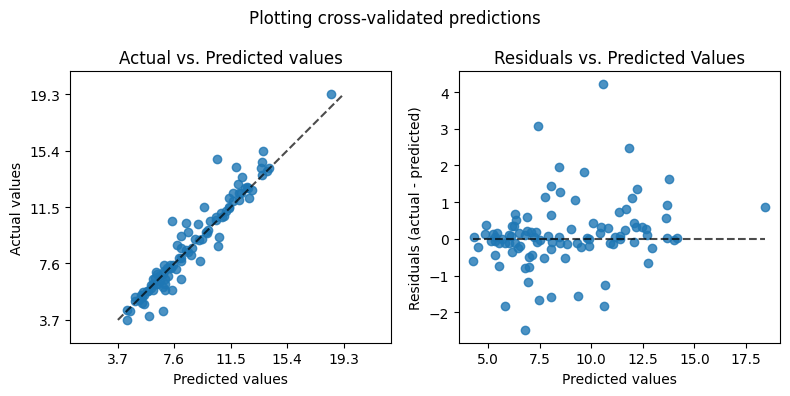

In [9]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_train = train[y].as_data_frame().values
y_pred = aml.leader.predict(train).as_data_frame().values

print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();